In [1]:
import numpy as np


# Data Modeling

In this part of the project is define the architectures of the Convolutional Neural Network, 

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
X = np.load("/content/drive/MyDrive/Dataset_image.npy")
y = np.load("/content/drive/MyDrive/Label_image.npy")

Analyze the shape of the dataset

In [4]:
X.shape, y.shape

((13807, 299, 299), (13807,))

Spli the dataset in Train set & Test set

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)
print("Traininig data shape : {} {}".format(X_train.shape, y_train.shape))
print("Testing data shape : {} {}".format(X_test.shape, y_test.shape))

Traininig data shape : (11045, 299, 299) (11045,)
Testing data shape : (2762, 299, 299) (2762,)


**Data Normalization** 

For each image let prepare to normalize the data
* redefine the dimension of the images to (299, 299)
* One image have (y, x) - (299, 299) pixeles, and the type of the value for the image a unsigned 8-bit integer witha values between (0 - 255), so the normalization is to map those value to (0 - 1)

In [7]:
X_train = X_train.reshape(-1, 299, 299, 1)
X_test = X_test.reshape(-1, 299, 299, 1)
X_train.shape, X_test.shape

((11045, 299, 299, 1), (2762, 299, 299, 1))

In [8]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train / 255
X_test = X_test / 255

**Split** data into test set & validation set

In [9]:
X_train, X_valid, train_label, valid_label = train_test_split(X_train, y_train, test_size = 0.20, random_state = 13)
X_train.shape, X_valid.shape, train_label.shape, valid_label.shape

((8836, 299, 299, 1), (2209, 299, 299, 1), (8836,), (2209,))

## Data Modeling

The images are of size 299 x 299. and feed this as an input to the network

Let's import all the necessary modules required

In [10]:
import keras
import tensorflow as tf
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [11]:
!nvidia-smi

Fri Nov 26 23:16:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Define the batch size and epochs

In [12]:
batch_size = 64
epochs = 20

Convolutional layers:
* First layer will have 32 - 3 x 3 filterss
* Second layer  will have 64  - 3 x 3 filters
* Third layer will have 128 - 3 x 3 filters 
* Three max poolig layer  2 x 2
* Dropout layers

In [13]:
cnn_model_covid_norma = Sequential()
cnn_model_covid_norma.add(Conv2D(32, kernel_size=(5, 5), activation='linear', padding='same', input_shape=(299, 299, 1)))
cnn_model_covid_norma.add(LeakyReLU(alpha = 0.1))
cnn_model_covid_norma.add(MaxPooling2D((4, 4), padding = 'same'))
cnn_model_covid_norma.add(Dropout(0.25))
cnn_model_covid_norma.add(Conv2D(64, (5, 5), activation='linear', padding = 'same'))
cnn_model_covid_norma.add(LeakyReLU(alpha = 0.1))
cnn_model_covid_norma.add(MaxPooling2D(pool_size = (4, 4), padding = 'same'))
cnn_model_covid_norma.add(Dropout(0.25))
cnn_model_covid_norma.add(Conv2D(128, (5, 5), activation = 'linear', padding = 'same'))
cnn_model_covid_norma.add(LeakyReLU(alpha = 0.1))                  
cnn_model_covid_norma.add(MaxPooling2D(pool_size = (4, 4), padding = 'same'))
cnn_model_covid_norma.add(Dropout(0.4))
cnn_model_covid_norma.add(Flatten())
cnn_model_covid_norma.add(Dense(128, activation="linear"))
cnn_model_covid_norma.add(LeakyReLU(alpha=0.1)) 
cnn_model_covid_norma.add(Dropout(0.3))
cnn_model_covid_norma.add(Dense(1, activation='sigmoid'))
cnn_model_covid_norma.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      832       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 299, 299, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                        

**Compile the model**

Compile the model:
* using the Adam Optimizer
* The loss type which is Binaray Cross Entropy ** 0 - "Normal" & 1 - "COVID"**

In [14]:
cnn_model_covid_norma.compile(loss = keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

Let's visualize the layers with the summay function to see the parameters (weigths and biases) in each layer and also the total parameters in the model

In [15]:
cnn_model_covid_norma.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      832       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 299, 299, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                        

**Train the model**

In [16]:
cnn_train_dropout = cnn_model_covid_norma.fit(X_train, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_valid, valid_label))

Epoch 1/20
139/139 [==============================] - 40s 200ms/step - loss: 0.4903 - accuracy: 0.7679 - val_loss: 0.2771 - val_accuracy: 0.8895
Epoch 2/20
139/139 [==============================] - 26s 184ms/step - loss: 0.2456 - accuracy: 0.9033 - val_loss: 0.1715 - val_accuracy: 0.9398
Epoch 3/20
139/139 [==============================] - 26s 184ms/step - loss: 0.1742 - accuracy: 0.9319 - val_loss: 0.1541 - val_accuracy: 0.9434
Epoch 4/20
139/139 [==============================] - 26s 184ms/step - loss: 0.1547 - accuracy: 0.9404 - val_loss: 0.1240 - val_accuracy: 0.9574
Epoch 5/20
139/139 [==============================] - 26s 184ms/step - loss: 0.1288 - accuracy: 0.9498 - val_loss: 0.1143 - val_accuracy: 0.9588
Epoch 6/20
139/139 [==============================] - 26s 184ms/step - loss: 0.1058 - accuracy: 0.9581 - val_loss: 0.1171 - val_accuracy: 0.9547
Epoch 7/20
139/139 [==============================] - 26s 184ms/step - loss: 0.0934 - accuracy: 0.9644 - val_loss: 0.1098 - val_ac

Let's save the model so that you can directly load it and not have to train it again for 20 epochs. Thisway, we can load the model later on if you need it and modify the architecture; Alternatively, you can start the training process on this saved model.

In [18]:
cnn_model_covid_norma.save("CNN_model_normal_covid.h5py")

INFO:tensorflow:Assets written to: CNN_model_normal_covid.h5py/assets


# Model Evaluation on the Test Set

Evaluate the model

In [19]:
test_eval = cnn_model_covid_norma.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.055689066648483276
Test accuracy: 0.9800869226455688


In [48]:
cnn_train_dropout.history

{'accuracy': [0.7746717929840088,
  0.8645314574241638,
  0.9160253405570984,
  0.9379810094833374,
  0.9517881274223328,
  0.9602761268615723,
  0.9698958992958069,
  0.9633318185806274,
  0.9789497256278992,
  0.9809868931770325,
  0.9875509142875671,
  0.9886826872825623,
  0.9893617033958435,
  0.9891353845596313,
  0.9854006171226501,
  0.9907197952270508,
  0.9890221953392029,
  0.9902670979499817,
  0.9886826872825623,
  0.9938886165618896],
 'loss': [0.5017915368080139,
  0.31773775815963745,
  0.2188471406698227,
  0.16644182801246643,
  0.1368526667356491,
  0.11210157722234726,
  0.08345133811235428,
  0.09861630946397781,
  0.05835631117224693,
  0.05040284991264343,
  0.03456605225801468,
  0.03315690904855728,
  0.02920447289943695,
  0.028216291218996048,
  0.040540847927331924,
  0.0250810869038105,
  0.03243584930896759,
  0.023863650858402252,
  0.028109466657042503,
  0.01694219559431076],
 'val_accuracy': [0.7804436683654785,
  0.8691715598106384,
  0.93209594488143

Plot the accuracy and loss plots between trainging and validation data

In [20]:
import matplotlib.pyplot as plt

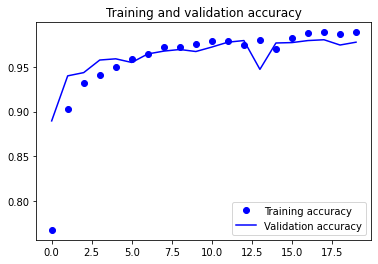

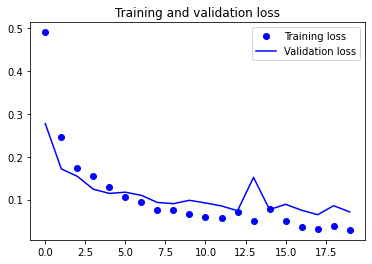

In [21]:
accuracy = cnn_train_dropout.history['accuracy']
val_accuracy = cnn_train_dropout.history['val_accuracy']
loss = cnn_train_dropout.history['loss']
val_loss = cnn_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Predict Labels**

Since the predictions you get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer

In [23]:
predicted_classes_2 = []
predicted_classes = cnn_model_covid_norma.predict(X_test)
for i in predicted_classes:
  if i > 0.75:
    predicted_classes_2.append(1)
  else:
    predicted_classes_2.append(0)

**Classification Report**

Identify the misclassified classes in more details

In [24]:
from sklearn.metrics import confusion_matrix
import itertools

In [25]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, predicted_classes_2, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98      2068
     Class 1       0.98      0.93      0.95       694

    accuracy                           0.98      2762
   macro avg       0.98      0.96      0.97      2762
weighted avg       0.98      0.98      0.98      2762



Function Confusion Matrix

In [26]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
cm = confusion_matrix(y_true=y_test, y_pred=predicted_classes_2)

Confusion matrix, without normalization
[[2053   15]
 [  49  645]]


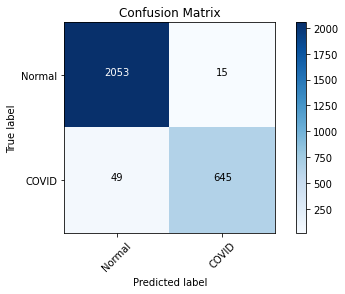

In [29]:
cm_plot_labels = ['Normal','COVID']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')